In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_scatter_density 
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

### Location

In [2]:
l = 122.843
b = 22.384

In [3]:
c = SkyCoord(l = l, b = b, unit='deg',  frame='galactic')

In [4]:
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (11.8654152, 85.25506102)>

### ADQL

```sql 
SELECT gaia_source.source_id, gaia_source.ra ,
gaia_source.ra_error, gaia_source.dec ,
gaia_source.dec_error, gaia_source.parallax,
gaia_source.parallax_error, gaia_source.pmra,
gaia_source.pmdec, gaia_source.phot_g_mean_mag,
gaia_source.bp_rp, gaia_source.bp_g,
gaia_source.g_rp, gaia_source.radial_velocity,
gaia_source.radial_velocity_error, gaia_source.phot_variable_flag,
gaia_source.l, gaia_source.b,
gaia_source.teff_val, gaia_source.a_g_val,
dist.r_est, dist.r_lo, dist.r_hi,
dist.r_len
FROM gaiadr2.gaia_source 
LEFT JOIN external.gaiadr2_geometric_distance as dist on (gaia_source.source_id = dist.source_id )
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(11.798,85.244,.5053,-2.3087,-.9565,-42.0300,2000,2015.5)),
		COORD2(EPOCH_PROP_POS(11.798,85.244,.5053,-2.3087,-.9565,-42.0300,2000,2015.5)),
		0.4166666666666667)
)=1
```

### DATA

In [2]:
df = pd.read_csv('../data/NGC188-result.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source_id              7507 non-null   int64  
 1   ra                     7507 non-null   float64
 2   ra_error               7507 non-null   float64
 3   dec                    7507 non-null   float64
 4   dec_error              7507 non-null   float64
 5   parallax               6919 non-null   float64
 6   parallax_error         6919 non-null   float64
 7   pmra                   6919 non-null   float64
 8   pmdec                  6919 non-null   float64
 9   phot_g_mean_mag        7507 non-null   float64
 10  bp_rp                  7102 non-null   float64
 11  bp_g                   7102 non-null   float64
 12  g_rp                   7103 non-null   float64
 13  radial_velocity        105 non-null    float64
 14  radial_velocity_error  105 non-null    float64
 15  phot

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,7507.0,5.738529e+17,1.443343e+14,5.733643e+17,5.737514e+17,5.739382e+17,5.739557e+17,5.740006e+17
ra,7507.0,1.180630e+01,2.359779e+00,6.782533e+00,1.003792e+01,1.178253e+01,1.353430e+01,1.682017e+01
ra_error,7507.0,6.649227e-01,1.867193e+00,1.169327e-02,7.288338e-02,2.255425e-01,5.599835e-01,5.457249e+01
dec,7507.0,8.523848e+01,1.952628e-01,8.483172e+01,8.509046e+01,8.523992e+01,8.538341e+01,8.565999e+01
dec_error,7507.0,6.050550e-01,1.799746e+00,1.076993e-02,5.956086e-02,1.823840e-01,5.269783e-01,5.728316e+01
parallax,6919.0,6.405634e-01,9.157274e-01,-4.292450e+00,2.550034e-01,5.033305e-01,8.516216e-01,1.768931e+01
parallax_error,6919.0,3.280350e-01,3.654952e-01,1.253059e-02,6.689462e-02,1.934906e-01,4.557029e-01,2.879778e+00
pmra,6919.0,4.326863e-01,8.025585e+00,-6.611801e+01,-2.511022e+00,-1.338707e+00,1.812557e+00,1.068473e+02
pmdec,6919.0,6.385240e-01,4.723772e+00,-4.414515e+01,-1.047037e+00,2.377246e-01,2.153540e+00,6.826566e+01
phot_g_mean_mag,7507.0,1.846463e+01,2.093162e+00,7.680104e+00,1.711346e+01,1.895048e+01,2.018937e+01,2.199511e+01


In [62]:
df = df[df['phot_g_mean_mag'] < 20]

In [63]:
hot = LinearSegmentedColormap.from_list('hot', 
    [
    (0, '#ffffff'),
    (1e-10, '#0B0000'),
    (0.15, '#720000'),
    (0.3, '#DB0000'),
    (0.45, '#FF4500'),
    (0.6, '#FFAE00'),
    (0.75, '#FFFF24'),
    (0.9, '#FFFFAC'),
    (1, "#ffffff")
    ], N=6565)

def using_mpl_scatter_density(fig, df, G_col):
    
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(df['bp_rp'], df[G_col], cmap=hot, )
    fig.colorbar(density, label='Number of points per pixel')
    ax.set_xlabel('$ G _{bp} - G _{rp} $')
    ax.set_ylabel('$ M_{G} $')

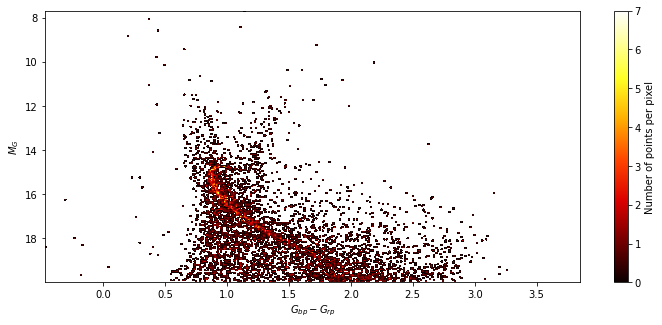

In [64]:
fig = plt.figure(figsize=(12,5))
using_mpl_scatter_density(fig, df, G_col='phot_g_mean_mag')
plt.gca().invert_yaxis()

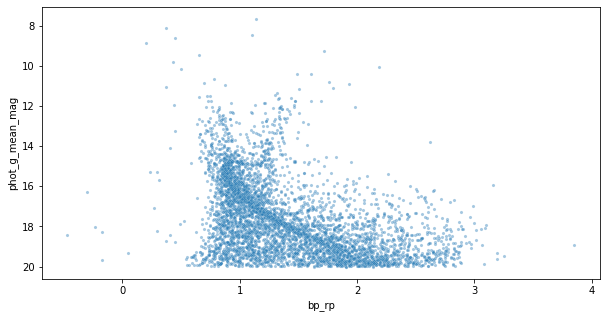

In [65]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y=df['phot_g_mean_mag'], x='bp_rp', alpha=0.4, s=10)
plt.gca().invert_yaxis()

In [66]:
df['Gmg'] = df['phot_g_mean_mag'] + (5 * np.log10(abs(df['parallax'])) - 10)

In [67]:
df[['phot_g_mean_mag', 'Gmg', 'bp_rp']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phot_g_mean_mag,5267.0,17.559917,1.858568,7.680104,16.343877,17.932579,19.123698,19.998800
Gmg,5211.0,5.972493,2.476790,-9.858096,4.372151,5.875951,7.615715,13.904974
bp_rp,5194.0,1.384072,0.528299,-0.470451,0.960320,1.227898,1.734053,3.853813


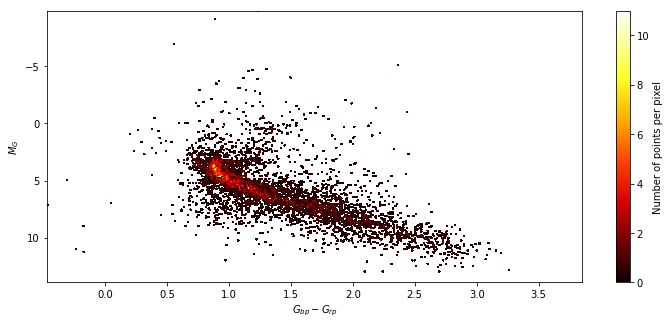

In [68]:
fig = plt.figure(figsize=(12,5))
using_mpl_scatter_density(fig, df, G_col='Gmg')
plt.gca().invert_yaxis()

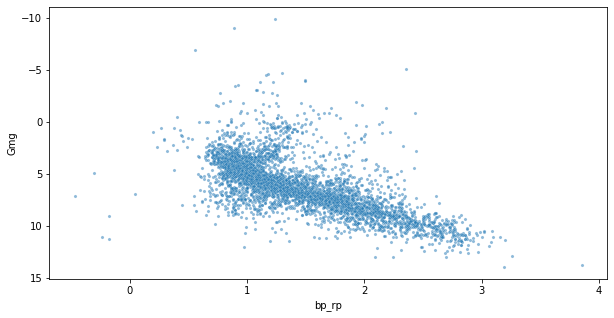

In [69]:
fig = plt.figure(figsize=(10,5))

sns.scatterplot(data=df, y=df['Gmg'], x='bp_rp', alpha=0.5, s=10)
plt.gca().invert_yaxis()

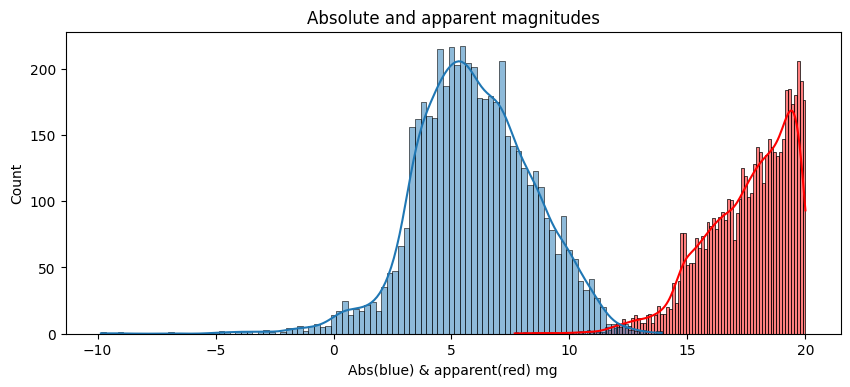

In [70]:
fig = plt.figure(figsize=(10,4), dpi=100)

sns.histplot(data=df['phot_g_mean_mag'], kde=True, bins=100, color='red')
sns.histplot(data=df['Gmg'], kde=True, bins=100)
plt.title('Absolute and apparent magnitudes')
plt.xlabel('Abs(blue) & apparent(red) mg');

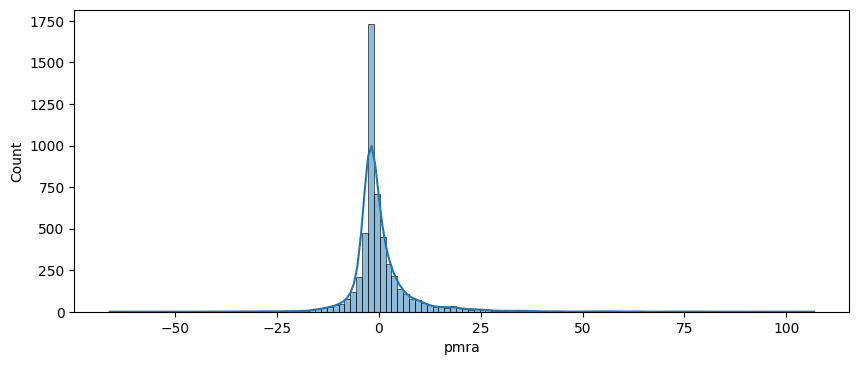

In [71]:
fig = plt.figure(figsize=(10,4), dpi=100)

sns.histplot(data=df['pmra'], kde=True, bins=120);

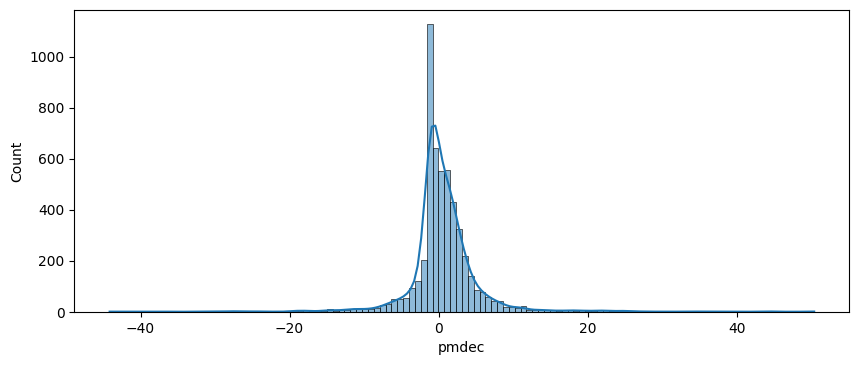

In [72]:
fig = plt.figure(figsize=(10,4), dpi=100)

sns.histplot(data=df['pmdec'], kde=True, bins=120);

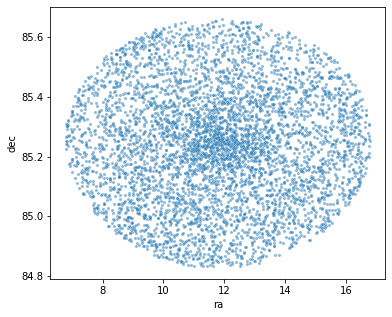

In [73]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data = df[['ra', 'dec']], x = 'ra', y='dec', alpha=0.5, s=10);

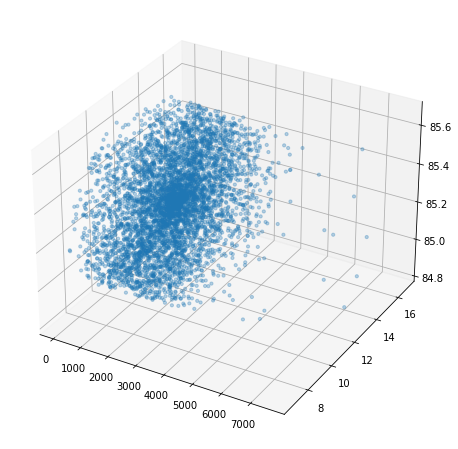

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['r_est'],df['ra'],df['dec'], s=10, alpha=0.3)
plt.show()

### Selecting Features

In [75]:
newdf = df[['ra','dec','parallax','pmra','pmdec','bp_rp','r_est','phot_g_mean_mag']].dropna(axis=0)
newdf.sample(5)

,ra,dec,parallax,pmra,pmdec,bp_rp,r_est,phot_g_mean_mag
6475,7.704633,85.203237,-0.032184,1.308280,1.860512,1.165932,3546.033484,18.344215
3994,10.110048,85.301706,0.635595,2.702737,1.857698,1.254522,1488.323025,17.598623
2730,14.853704,85.129540,1.118113,1.875205,5.386587,2.013241,879.811484,18.422108
4900,10.115220,85.413245,0.314714,-3.680636,-1.577486,2.050470,1692.033330,19.682854
5752,10.547552,85.422744,0.650021,-2.276446,-0.851145,1.053696,1466.326789,16.718441


In [76]:
data = newdf[abs(newdf['pmra']) < 15]
data = data[abs(data['pmdec']) < 15]
len(data)

4825

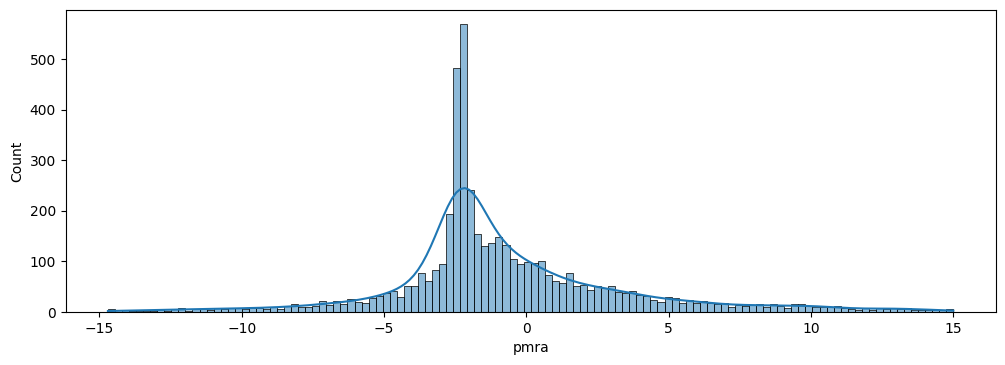

In [77]:
plt.figure(figsize=(12,4), dpi=100)

sns.histplot(data=data, x='pmra', bins=120 , kde=True);

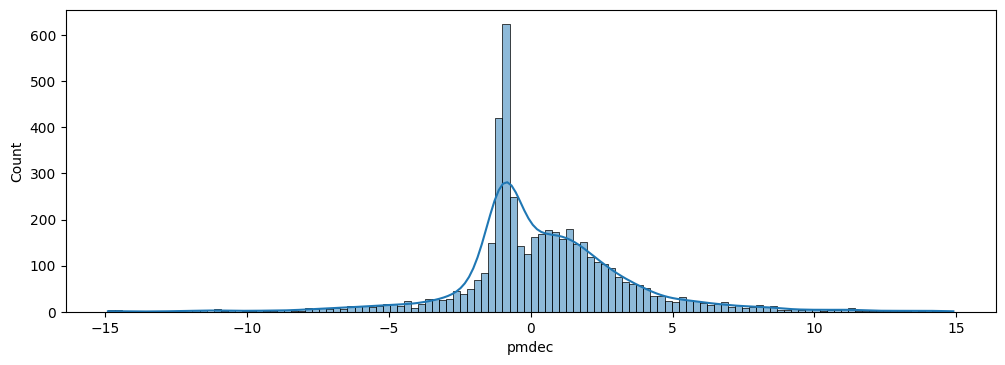

In [78]:
plt.figure(figsize=(12,4), dpi=100)

sns.histplot(data=data, x='pmdec', bins=120 , kde=True);

In [79]:
from scipy.optimize import curve_fit

def fit_curve(data, column, bins = 100):
    
    plt.figure(figsize=(12,3), dpi=120)
    counts, bins, patches = plt.hist(data[column], bins = bins)

    # Define the Gaussian function
    def gaussian(x, amp, mu, sigma):
        return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))
    
    # data
    x_data = bins[:-1]
    y_data = counts
    
    # Fit the Gaussian function to the data
    popt, pcov = curve_fit(gaussian, x_data, y_data)
    
    plt.figure(figsize=(12,3), dpi=120)
    # Plot the original data and the fitted curve
    sns.scatterplot(x_data, y_data, label=column)
    plt.plot(x_data, gaussian(x_data, *popt), color='red', label='Fit')
    plt.legend()
    plt.show()
    
    return popt

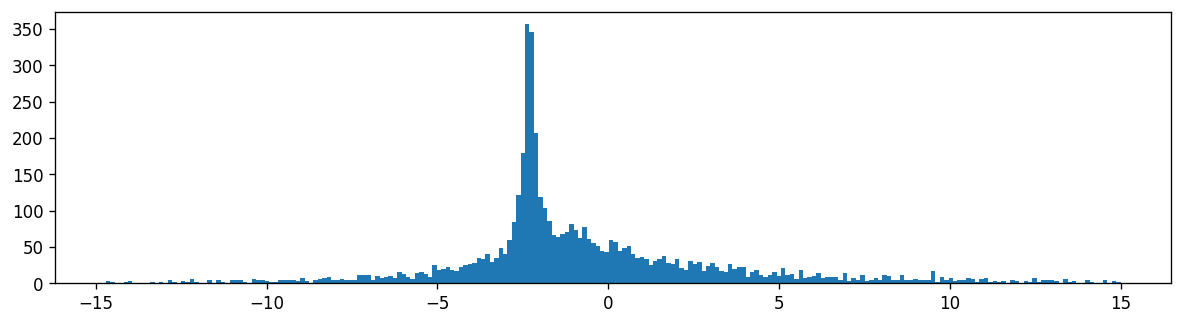

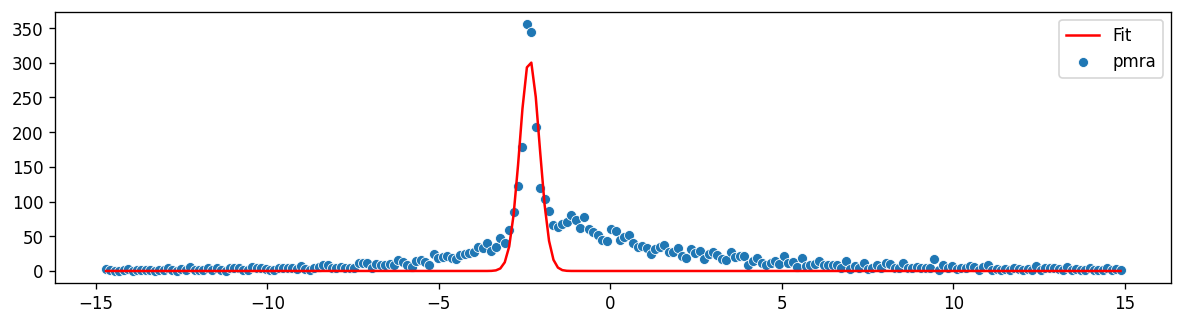

In [80]:
amp, mu, std = fit_curve(data=data, column='pmra', bins=230)

In [81]:
print(mu + 3*std)
print(mu - 3*std)

-3.213838271391994
-1.4937016355780095


In [82]:
clusterdf = data[(data['pmra'] > -3.21) & (data['pmra'] < -1.5)]

In [83]:
len(clusterdf)

1830

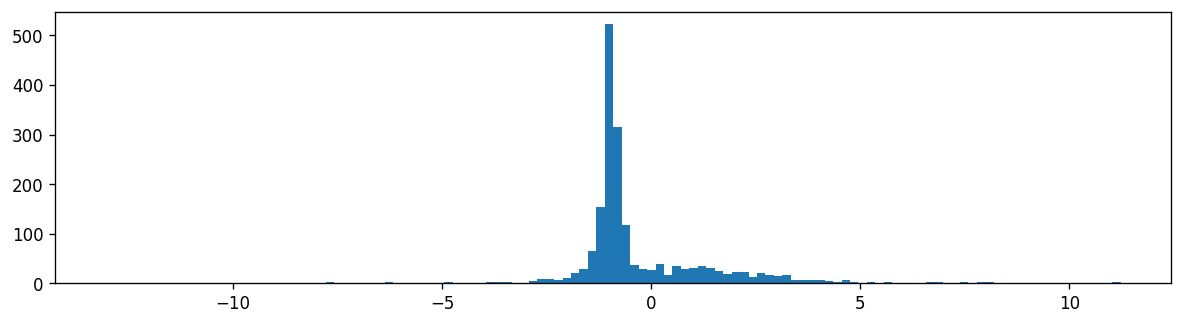

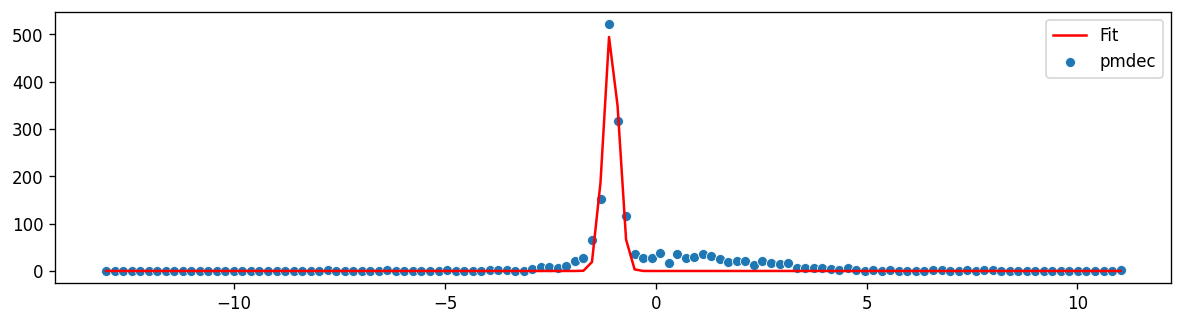

In [84]:
amp, mu, std = fit_curve(data=clusterdf, column='pmdec', bins=120)

In [85]:
print(mu + 3*std)
print(mu - 3*std)

-0.5317318518244665
-1.5887988341664407


In [86]:
clusterdf = clusterdf[(clusterdf['pmdec'] > -1.59) & (clusterdf['pmdec'] < -0.53)]

In [95]:
len(clusterdf)

878

In [92]:
clusterdf = clusterdf[clusterdf['phot_g_mean_mag'] < 18]

In [93]:
def cmd_plot(data, x_axis, y_axis, alpha=0.8, s=5):
    with plt.style.context(['ieee']):
        fig = plt.figure(figsize=(6,6), dpi=100)
        sns.scatterplot(data=data, y=y_axis, x=x_axis, alpha=alpha, s=s)
        plt.gca().invert_yaxis();

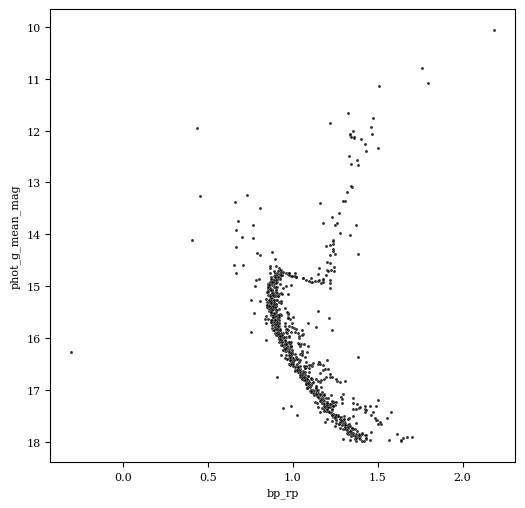

In [94]:
cmd_plot(clusterdf, 'bp_rp','phot_g_mean_mag')

### GMM

In [26]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=101)

In [27]:
ypred = gm.fit_predict(data[['pmra', 'pmdec']])
data['label'] = ypred
data['label'].value_counts()

0    3688
1    1137
Name: label, dtype: int64

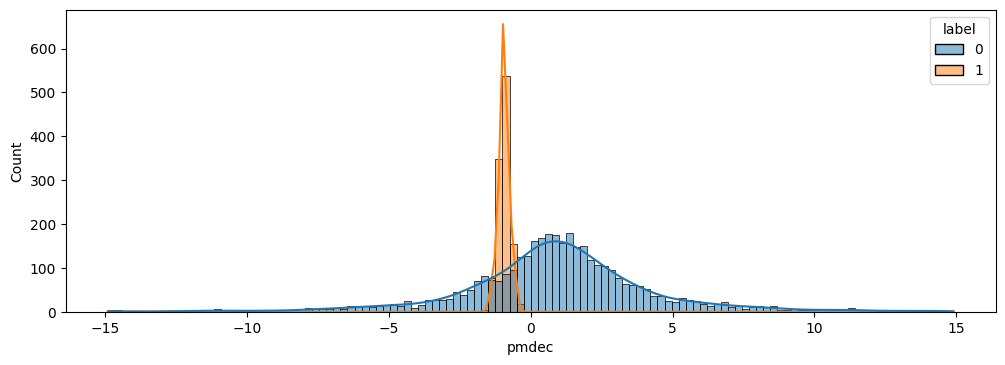

In [28]:
plt.figure(figsize=(12,4), dpi=100)

sns.histplot(data=data, x='pmdec', bins=120 , kde=True, hue='label');

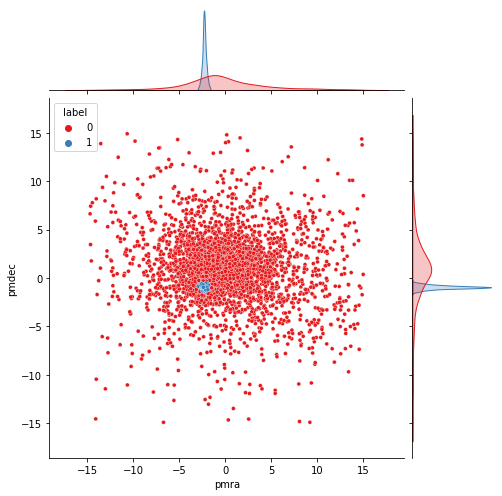

In [29]:
sns.jointplot(x='pmra', y='pmdec', data=data, palette='Set1', kind='scatter', hue='label', s=16,
              height=7, ratio=4, space=0.1);

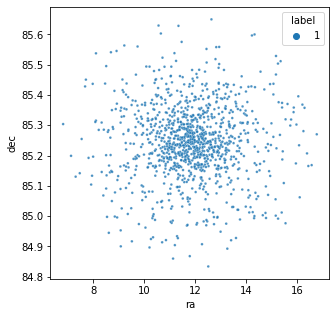

In [30]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data = data[data['label']==1], x = 'ra', y='dec', alpha=0.8, s=7, hue='label');

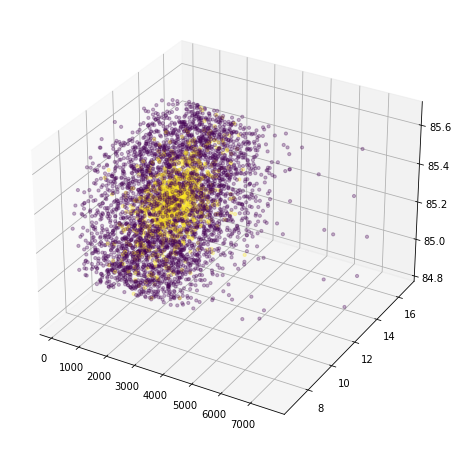

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['r_est'],data['ra'],data['dec'], s=10, alpha=0.3, c=data['label'])
plt.show()

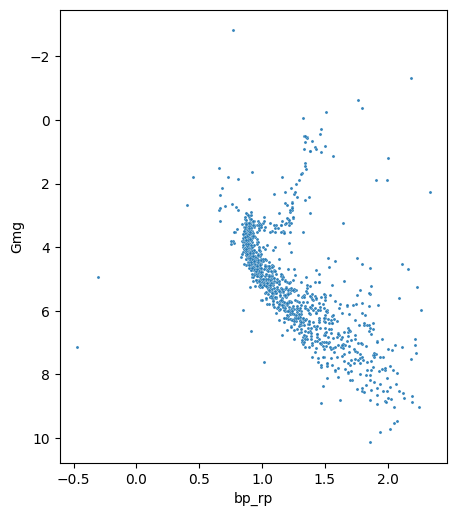

In [32]:
fig = plt.figure(figsize=(5,6), dpi=100)

sns.scatterplot(data=data[data['label'] == 1], y=data['Gmg'], x='bp_rp', alpha=0.9, s=5)
# sns.scatterplot(data=data[data['label'] == 1], y=data['Gmg'], x='bp_rp', alpha=0.9, s=5)
plt.gca().invert_yaxis()

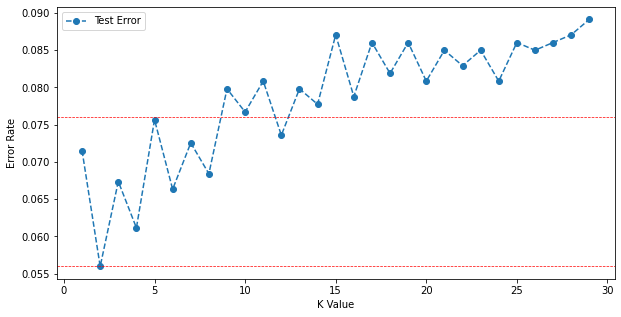

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1), data['label'],
                                                    test_size=0.2, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

test_errors = []

for i in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(err)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,30),test_errors,'--o',label='Test Error')

plt.axhline(y=0.056, color='red', ls='--', lw=0.7)
plt.axhline(y=0.076, color='red', ls='--', lw=0.7)

plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value");

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       744
           1       0.90      0.86      0.88       221

    accuracy                           0.94       965
   macro avg       0.93      0.91      0.92       965
weighted avg       0.94      0.94      0.94       965



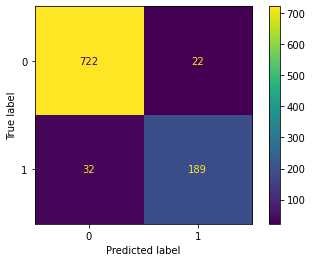

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();
print(classification_report(y_test, y_pred))

## load knn_model trained on M67 

In [36]:
import joblib

In [37]:
knn_model = joblib.load("knn_model.joblib")

In [38]:
X_train.shape

(3860, 8)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       744
           1       0.77      0.95      0.85       221

    accuracy                           0.92       965
   macro avg       0.88      0.93      0.90       965
weighted avg       0.93      0.92      0.93       965



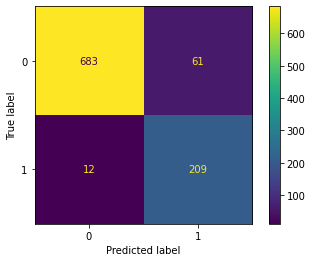

In [39]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();
print(classification_report(y_test, y_pred))

In [40]:
joblib.dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']